# Importando bibliotecas e carregando dataframe



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/lucasvitorsr/projeto-taxa-de-suicidio/blob/main/base%20de%20dados/base%20de%20dados%20limpa/dataset_limpo.csv?raw=true")

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_for_year,gdp_per_capita,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Europe


In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k_pop,gdp_per_capita
count,26664.000000,26664.000000,2.666400e+04,26664.000000,26664.000000
mean,2001.121062,252.069382,1.885154e+06,13.036133,17108.988299
std,8.400964,920.088522,3.974251e+06,19.123598,19050.587186
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,3.000000,1.108942e+05,1.010000,3399.000000
50%,2001.500000,27.000000,4.534070e+05,6.170000,9655.000000
75%,2008.000000,140.250000,1.506216e+06,16.860000,25570.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,126352.000000


# Explorando os dados

* **Taxa de suicídio**


> 1.   **Por ano**

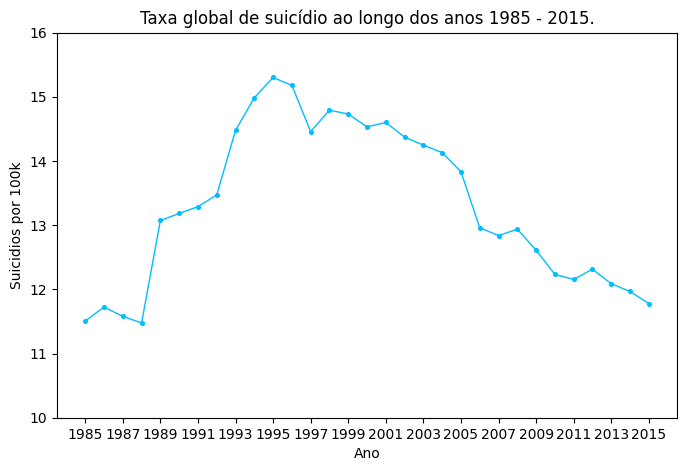

In [ ]:
df_grouped = df.groupby("year").agg({
    "population": "sum",
    "suicides_no": "sum"
}).reset_index()

df_grouped["suicides_per_100k"] = (df_grouped["suicides_no"] / df_grouped["population"]) * 100000
plt.figure(figsize=(8, 5))
plt.plot(df_grouped["year"], df_grouped["suicides_per_100k"], color="deepskyblue", linewidth=1)
plt.scatter(df_grouped["year"], df_grouped["suicides_per_100k"], color="deepskyblue", s=7)

plt.title("Taxa global de suicídio ao longo dos anos 1985 - 2015.")
plt.xlabel("Ano")
plt.ylabel("Suicidios por 100k")

plt.xticks(range(1985, 2016, 2))
plt.yticks(range(10, 17))

plt.show()

1) Taxa global de suicídios cresce reapidamente até mais ou menos 95, depois decresce

> 2. **Por sexo**

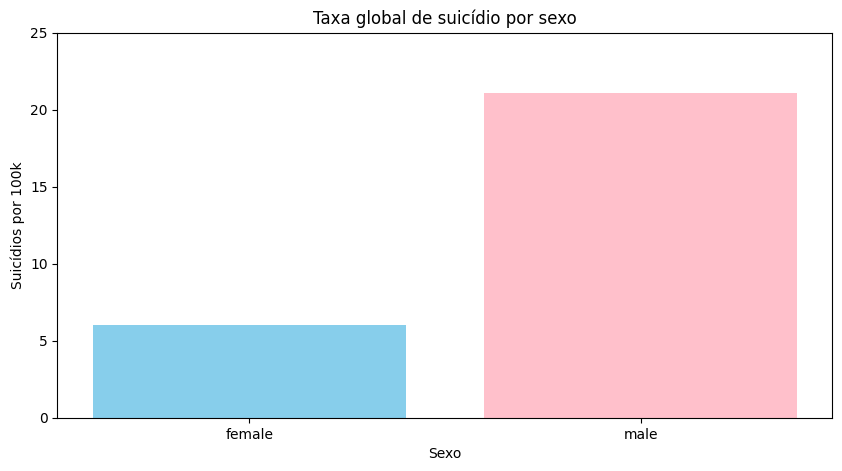

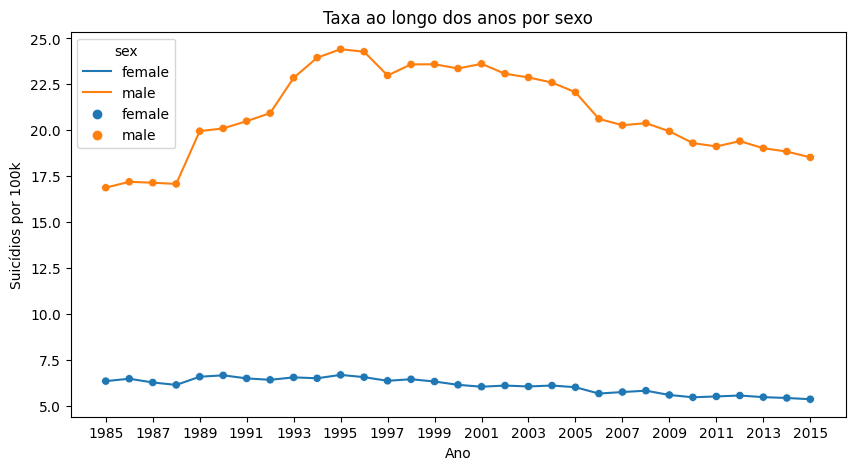

In [ ]:
# Gráfico 1
df_sex = df.groupby("sex").agg({"suicides_no": "sum", "population": "sum"}).reset_index()
df_sex["suicide_per_100k"] = (df_sex["suicides_no"] / df_sex["population"]) * 100000

plt.figure(figsize=(10, 5))
plt.bar(df_sex["sex"], df_sex["suicide_per_100k"], color=["skyblue", "pink"])

plt.title("Taxa global de suicídio por sexo")
plt.xlabel("Sexo")
plt.ylabel("Suicídios por 100k")
plt.ylim(0, 25)

plt.show()

# Gráfico 2
df_sex_time = df.groupby(["year", "sex"]).agg({"suicides_no": "sum", "population": "sum"}).reset_index()
df_sex_time["suicide_per_100k"] = (df_sex_time["suicides_no"] / df_sex_time["population"]) * 100000

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sex_time, x="year", y="suicide_per_100k", hue="sex")
sns.scatterplot(data=df_sex_time, x="year", y="suicide_per_100k", hue="sex")

plt.title("Taxa ao longo dos anos por sexo")
plt.xlabel("Ano")
plt.ylabel("Suicídios por 100k")

plt.xticks(range(1985, 2016, 2))

plt.show()

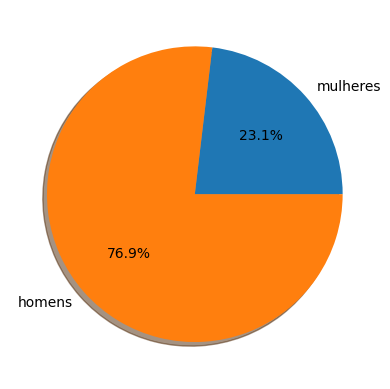

In [ ]:
# extrair valores entre homens e mulheres
homens_mulheres = df.groupby('sex').suicides_no.sum() / df.groupby('sex').suicides_no.sum().sum()

# plotar o gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

1) Alta diferença entre as taxas de suicídio para o gênero masculino e feminino.

> 3. **Por país**

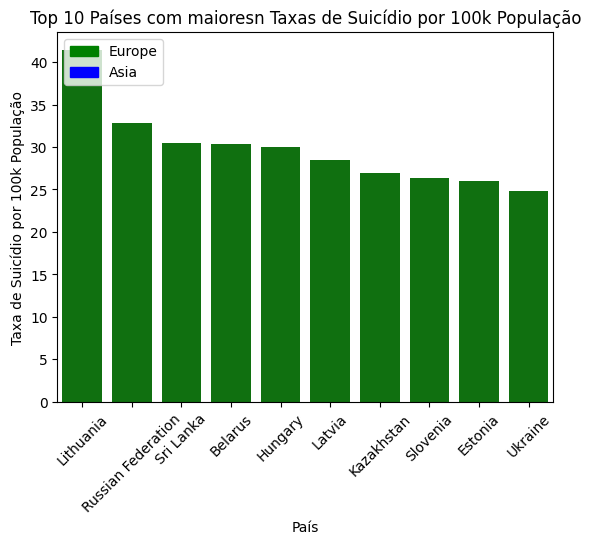

In [ ]:
mean_suicides = df.groupby('country').apply(lambda x: (x['suicides_no'].sum() / x['population'].sum()) * 100000)
mean_suicides = mean_suicides.sort_values(ascending=False).head(10)

# Obter os continentes dos países selecionados
continents = df.loc[df['country'].isin(mean_suicides.index), 'continent']

ax = sns.barplot(x=mean_suicides.index, y=mean_suicides.values, palette=[colors[continent] for continent in continents])

# Adicionar legenda
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[continent]) for continent in set(continents)]
labels = set(continents)
plt.legend(handles, labels, loc='upper left')

# Adicionar rótulos ao gráfico
plt.xlabel('País')
plt.ylabel('Taxa de Suicídio por 100k População')
plt.title('Top 10 Países com maioresn Taxas de Suicídio por 100k População')

plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

1) Países europeus possuem as maiores taxa

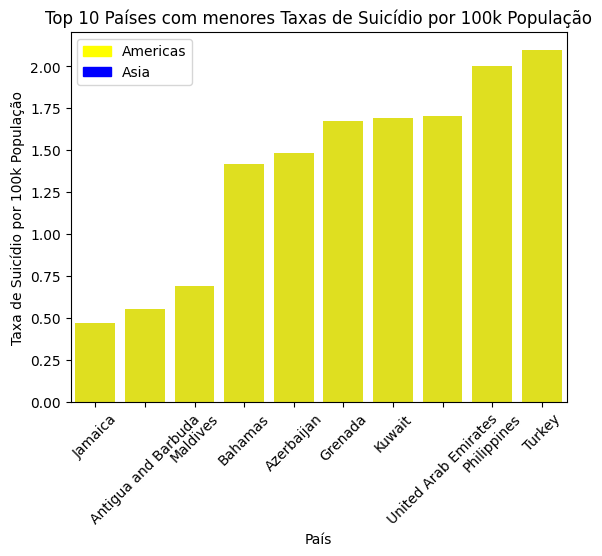

In [ ]:
mean_suicides = df.groupby('country').apply(lambda x: (x['suicides_no'].sum() / x['population'].sum()) * 100000)
mean_suicides = mean_suicides.sort_values(ascending=True).head(10)

# Obter os continentes dos países selecionados
continents = df.loc[df['country'].isin(mean_suicides.index), 'continent']

ax = sns.barplot(x=mean_suicides.index, y=mean_suicides.values, palette=[colors[continent] for continent in continents])

# Adicionar legenda
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[continent]) for continent in set(continents)]
labels = set(continents)
plt.legend(handles, labels, loc='upper left')

# Adicionar rótulos ao gráfico
plt.xlabel('País')
plt.ylabel('Taxa de Suicídio por 100k População')
plt.title('Top 10 Países com menores Taxas de Suicídio por 100k População')

plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

> 4. **Por continente**


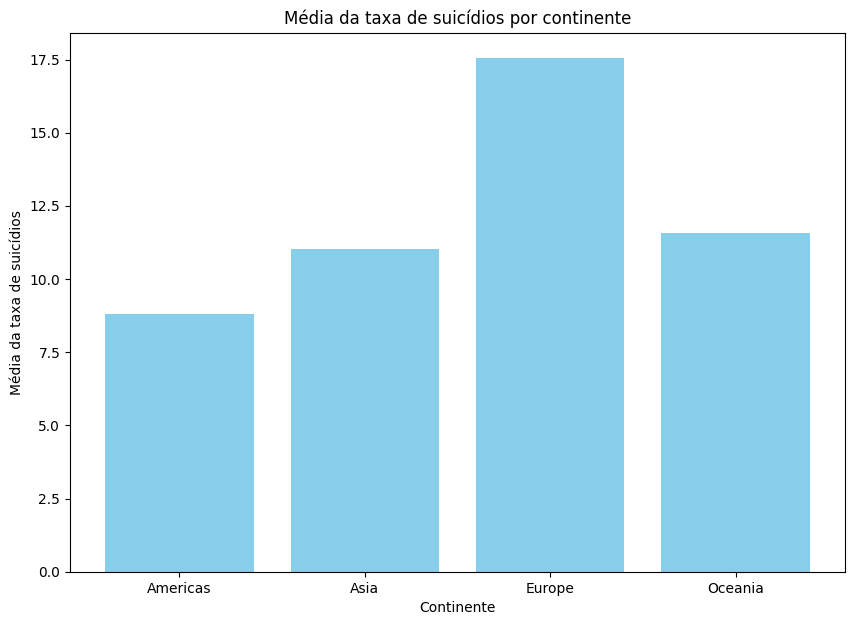

In [ ]:
df_grouped = df.groupby("continent").agg({"suicides/100k_pop": "mean"}).reset_index()

plt.figure(figsize=(10, 7))
plt.bar(df_grouped["continent"], df_grouped["suicides/100k_pop"], color="skyblue")
plt.title("Média da taxa de suicídios por continente")
plt.xlabel("Continente")
plt.ylabel("Média da taxa de suicídios")

plt.show()

5. Por idade

In [ ]:
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

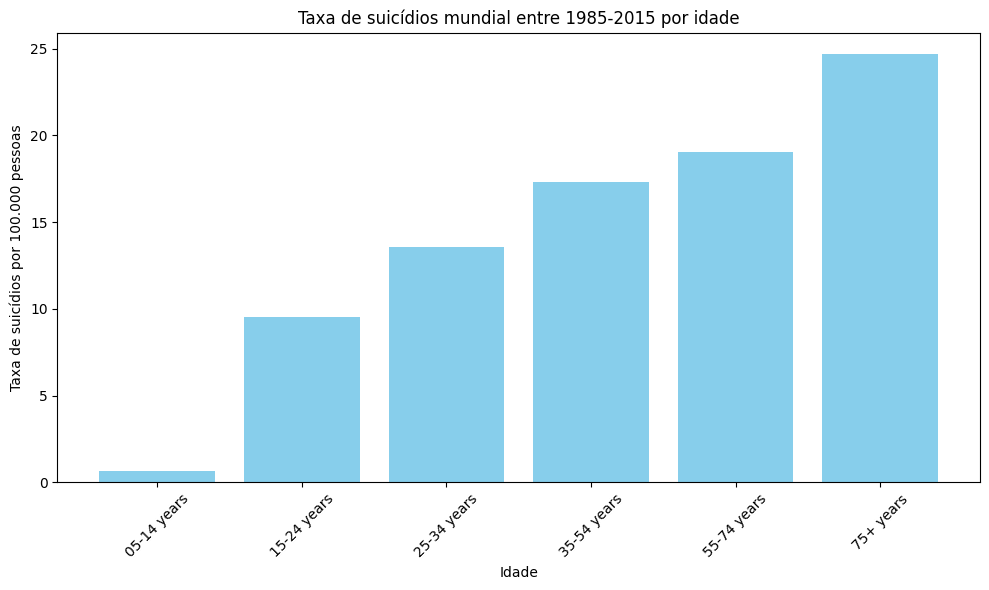

In [ ]:
df_filtered = df[["age", "suicides_no", "population"]]
df_grouped = df_filtered.groupby("age").sum().reset_index()
df_grouped["suicide_rate"] = df_grouped["suicides_no"] / df_grouped["population"] * 100000  # Calcula a taxa de suicídio por 100.000 pessoas
age_order = ["05-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
df_grouped["age"] = pd.Categorical(df_grouped["age"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped["age"], df_grouped["suicide_rate"], color="skyblue")

plt.title("Taxa de suicídios total entre 1985-2015 por idade")
plt.xlabel("Idade")
plt.ylabel("Taxa de suicídios por 100.000 pessoas")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<ipython-input-22-77a685d02e0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(["continent", "year"]).mean()["suicides/100k_pop"].reset_index()


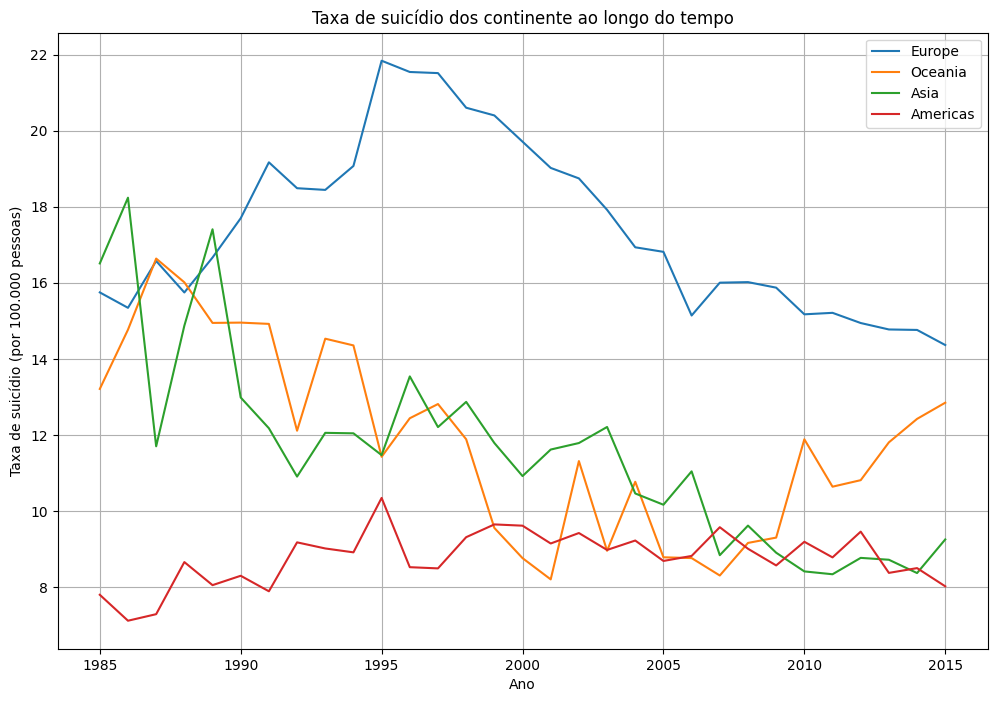

In [ ]:
df_grouped = df.groupby(["continent", "year"]).mean()["suicides/100k_pop"].reset_index()

# Selecionar os 10 continentes com maior taxa de suicídio
top_continents = df_grouped.groupby("continent").mean()["suicides/100k_pop"].nlargest(10).index

# Filtrar o conjunto de dados para incluir apenas os 10 continentes com maior taxa de suicídio
df_top_continents = df_grouped[df_grouped["continent"].isin(top_continents)]

# Criar um gráfico de linhas
plt.figure(figsize=(12, 8))

# Iterar sobre os continentes selecionados e plotar as linhas
for continent in top_continents:
    data = df_top_continents[df_top_continents["continent"] == continent]
    plt.plot(data["year"], data["suicides/100k_pop"], label=continent)

plt.title("Taxa de suicídio dos continente ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Taxa de suicídio (por 100.000 pessoas)")
plt.legend()
plt.grid(True)

plt.show()

<ipython-input-15-92d41f2d54a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gdp_for_year'] = df_filtered['gdp_for_year'].str.replace(',', '').astype(float)


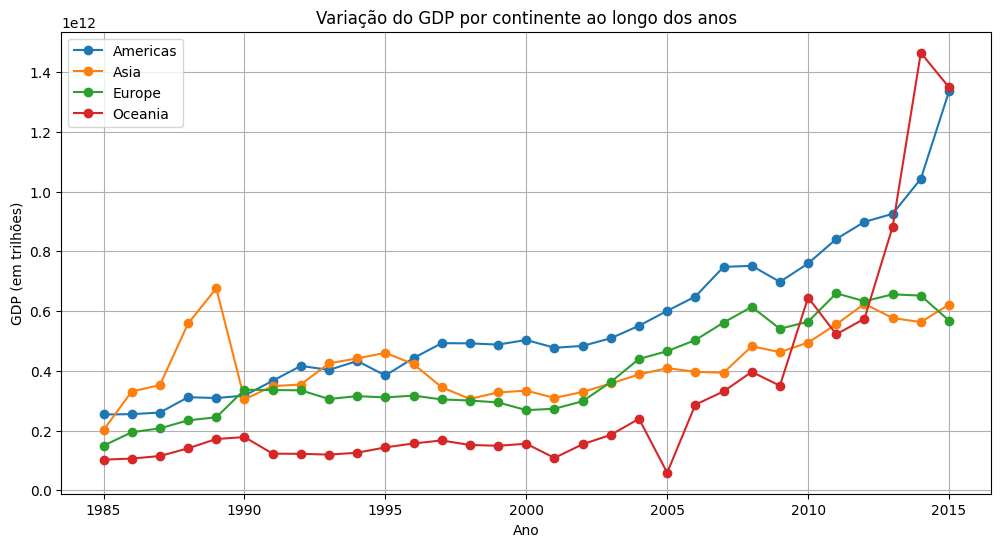

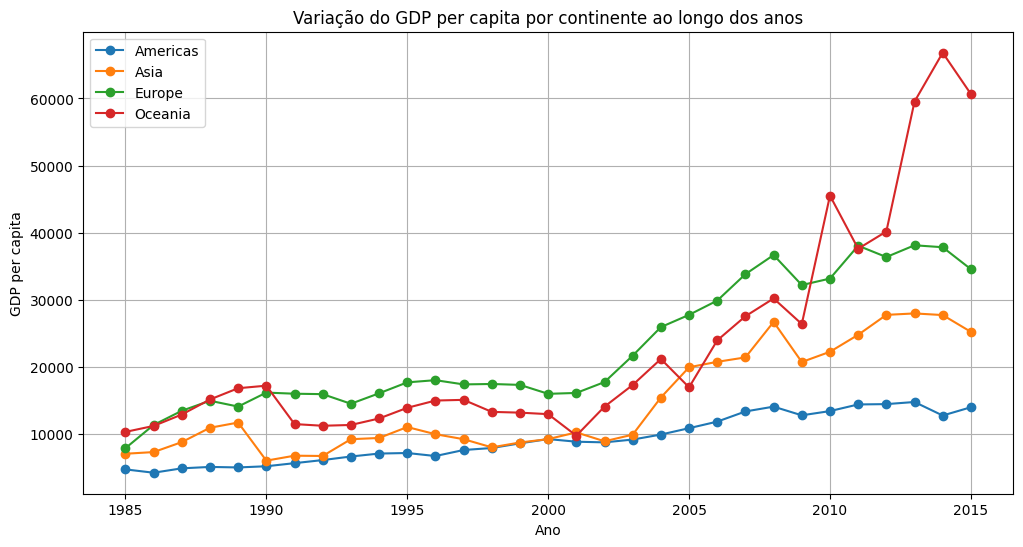

In [ ]:
# Filtrar as colunas relevantes
df_filtered = df[['year', 'continent', 'gdp_for_year', 'gdp_per_capita']]

# Converter as colunas 'gdp_for_year' para numérico
df_filtered['gdp_for_year'] = df_filtered['gdp_for_year'].str.replace(',', '').astype(float)

# Agrupar por ano e continente, calculando a média do GDP e do GDP per capita
df_grouped = df_filtered.groupby(['year', 'continent']).mean().reset_index()

# Definir a ordem dos continentes para exibição no gráfico
continent_order = ['Americas', 'Asia', 'Europe', 'Oceania']

# Criar gráfico de linha para o GDP ao longo dos anos por continente
plt.figure(figsize=(12, 6))
for continent in continent_order:
    plt.plot(df_grouped[df_grouped['continent'] == continent]['year'],
             df_grouped[df_grouped['continent'] == continent]['gdp_for_year'],
             marker='o', label=continent)

plt.title('Variação do GDP por continente ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('GDP (em trilhões)')
plt.legend()
plt.grid(True)
plt.show()

# Criar gráfico de linha para o GDP per capita ao longo dos anos por continente
plt.figure(figsize=(12, 6))
for continent in continent_order:
    plt.plot(df_grouped[df_grouped['continent'] == continent]['year'],
             df_grouped[df_grouped['continent'] == continent]['gdp_per_capita'],
             marker='o', label=continent)

plt.title('Variação do GDP per capita por continente ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)
plt.show()

- Número de suicídios

1. No tempo

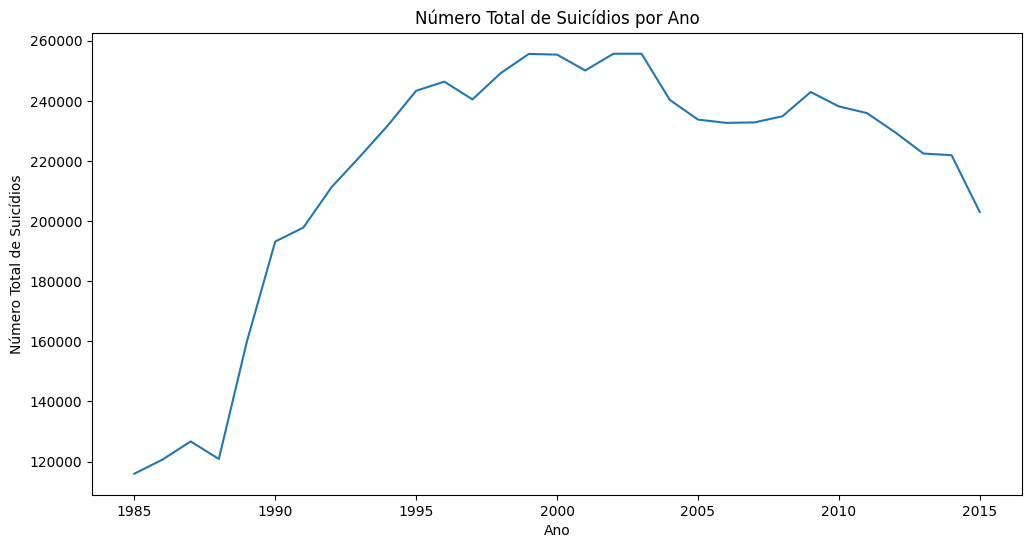

In [ ]:
total_suicides = df.groupby('year')['suicides_no'].sum().reset_index()

# Criar o gráfico de linha utilizando o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides_no', data=total_suicides)

# Adicionar título e rótulos aos eixos
plt.title('Número Total de Suicídios por Ano')
plt.xlabel('Ano')
plt.ylabel('Número Total de Suicídios')

# Exibir o gráfico
plt.show()

1) Alta taxa de crescimento no número de suicídios até 95, em seguida, o número de suicídios parece estabilizar-se, e a partir de 2007, observa-se uma queda considerável  

2. Por continente

<ipython-input-11-3d37f491d713>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(["continent", "year"]).mean()["suicides_no"].reset_index()


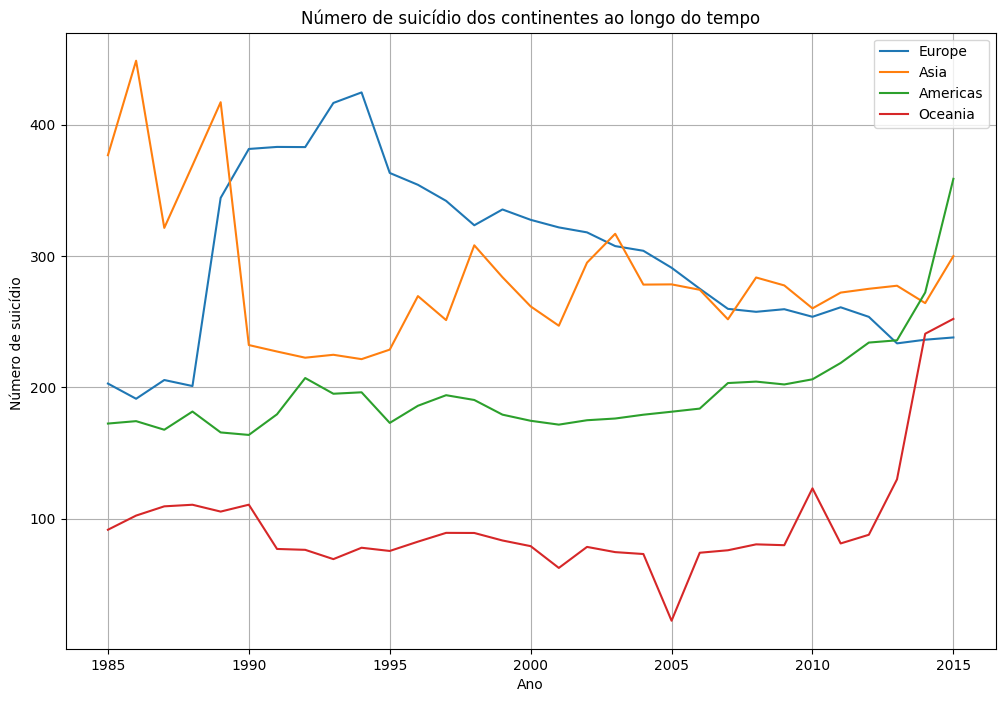

In [ ]:
df_grouped = df.groupby(["continent", "year"]).mean()["suicides_no"].reset_index()

# Selecionar os 10 continentes com maior taxa de suicídio
top_continents = df_grouped.groupby("continent").mean()["suicides_no"].nlargest(10).index

# Filtrar o conjunto de dados para incluir apenas os 10 continentes com maior taxa de suicídio
df_top_continents = df_grouped[df_grouped["continent"].isin(top_continents)]

# Criar um gráfico de linhas
plt.figure(figsize=(12, 8))

# Iterar sobre os continentes selecionados e plotar as linhas
for continent in top_continents:
    data = df_top_continents[df_top_continents["continent"] == continent]
    plt.plot(data["year"], data["suicides_no"], label=continent)

plt.title("Número de suicídio dos continentes ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Número de suicídio ")
plt.legend()
plt.grid(True)

plt.show()

1) Notável queda no número de suicídios na Europa a partir de 95, que possui a maior taxa e número de suicídio.
2) A partir de meados de

3. Proporção por idade

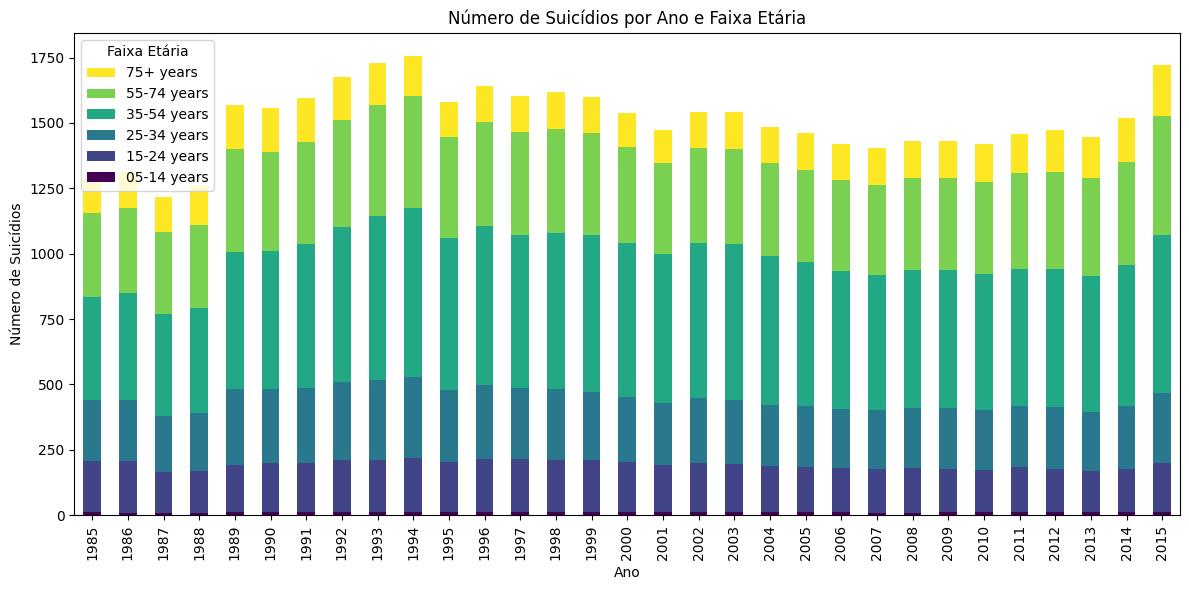

In [ ]:
column_order = ['05-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(12, 6))
table.plot.bar(stacked=True, ax=ax, cmap='viridis')

# Definir rótulos e título do gráfico
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios por Ano e Faixa Etária')

# Configurar legenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title="Faixa Etária", loc='upper left')

# Ajustar espaçamento entre as barras e o limite do eixo y
plt.tight_layout()

# Exibir o gráfico
plt.show()

1) adultos cometem mais suicidios que os jovens

- Correlação

In [ ]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '')
df['gdp_for_year'] = df['gdp_for_year'].astype(float)

<ipython-input-49-b783536dc0d1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_variables.corr()


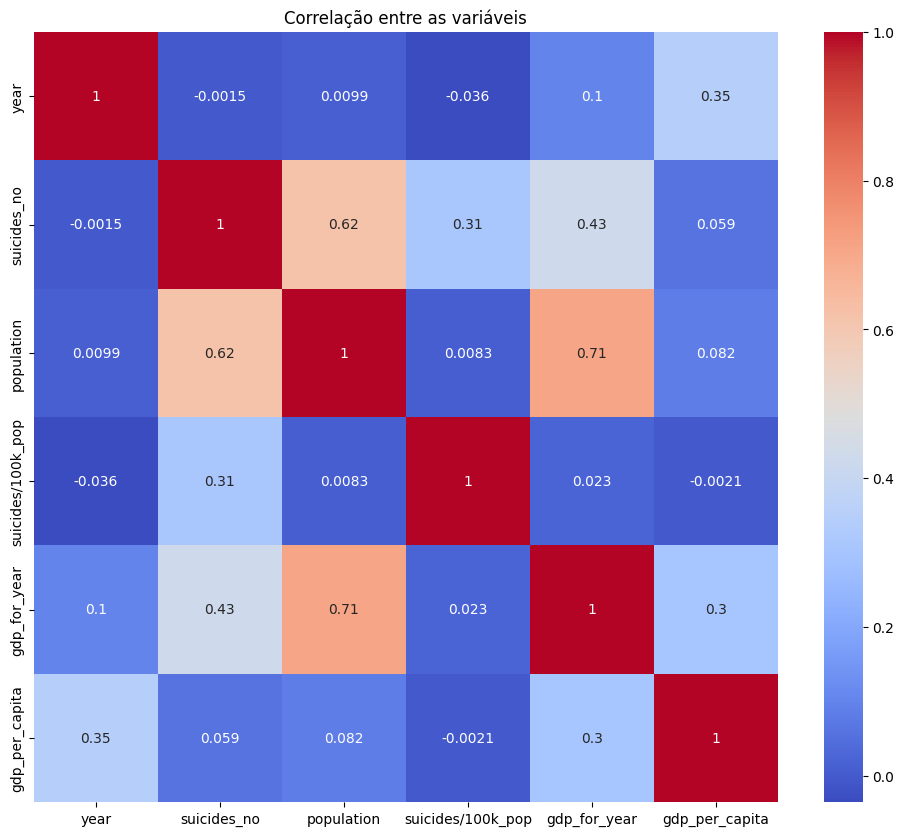

In [ ]:
# Selecionar as variáveis numéricas
numeric_variables = df.select_dtypes(include=['int64', 'float64', 'object'])

# Calcular a matriz de correlação
correlation_matrix = numeric_variables.corr()

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar o título do heatmap
plt.title('Correlação entre as variáveis')

# Exibir o heatmap
plt.show()

A unica correlação relevante é entre população e PIB anual